# Mean Force Integration in 1D

Import HILLS and COLVAR files, compute the mean force and integrate using the pyMFI (would be) module. 

10000
20.0%   OFE = 9.2506
40.0%   OFE = 9.2644
60.0%   OFE = 9.1619
80.0%   OFE = 9.0793
100.0%   OFE = 8.9749


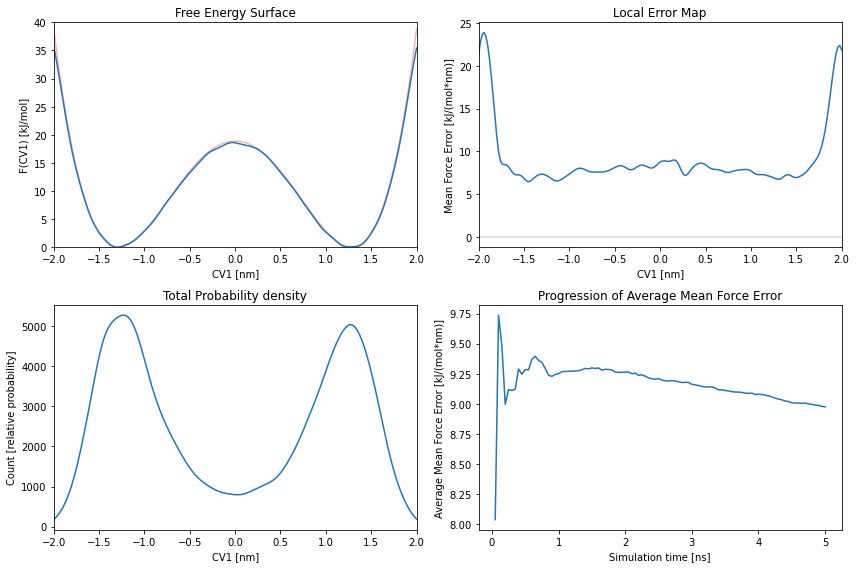

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from pyMFI import MFI1D
import os
os.chdir("/home/antoniu/Desktop/MFI_git/MFI_master/MFI/1D_double_well")



#Read the HILLS file
HILLS=MFI1D.load_HILLS(hills_name="HILLS")

print(len(HILLS))

#Read the Colvar File
position = MFI1D.load_position(position_name="position")

#Compute the time-independent mean force
[X, Ftot_den, Ftot, ofv, ofe, ofv_history, ofe_history, time_history, intermediate_fes_list, intermediate_time_list] = MFI1D.MFI_1D(HILLS = HILLS, position = position, bw = 0.1, kT = 1, log_pace = 5, error_pace = 100, min_grid=-2.0, max_grid=2.0, WellTempered=1, intermediate_fes_number=100)


# Integrate Ftot, obtain FES 
FES = MFI1D.intg_1D(X,Ftot)
# Plot Recap
MFI1D.plot_recap(X, FES, Ftot_den, ofe, ofe_history, time_history, FES_lim=40, ofe_lim = 15, error_log_scale=0)


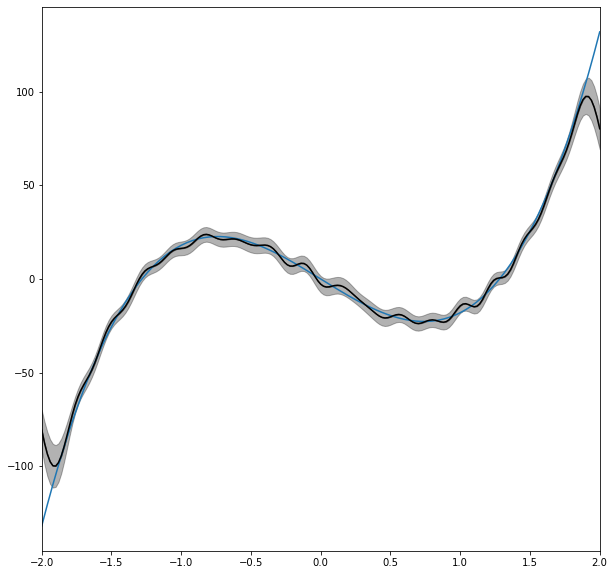

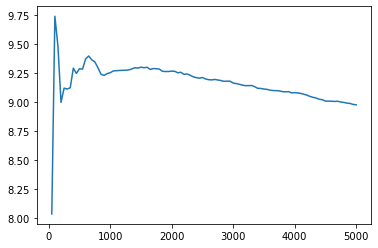

In [18]:
# plt.plot(X, Ftot)

F = 7*X**4-23*X**2
Ff = 28*X**3 - 46*X
F = F - min(F)

plt.figure(figsize=(10,10))
plt.plot(X,Ff)
plt.plot(X, Ftot, color="black")
plt.fill_between(X, Ftot, Ftot-ofe/2, color="black", alpha=0.3)
plt.fill_between(X, Ftot, Ftot+ofe/2, color="black", alpha=0.3)
plt.xlim(-2,2)
plt.show()
    
plt.plot(time_history, ofe_history)
# plt.ylim(0,2)
plt.show()

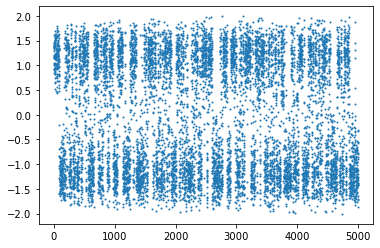

In [18]:
plt.scatter(HILLS[:,0],HILLS[:,1], s=1)

In [6]:
results_path = "/home/antoniu/Desktop/MFI_git/MFI_master/MFI/results_plot"

MFI1D.save_pkl([X, F, Ff, FES, Ftot, ofe, ofe_history, time_history], results_path + "/MFI1D_results.pkl")


'/home/antoniu/Desktop/MFI_git/MFI_master/MFI/1D_double_well'